<a href="https://colab.research.google.com/github/Olin-RoboSys/test-colab/blob/main/Module_1a_Image_processing_(traditional_methods).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1: 2D Color Image Processing

### Goals:
1. Students build an intuition about digital image representation
2. Students are able to use existing Python libraries to perform basic image processing operations
3. Students can develop an image processing pipeline to perform main tasks:
  - Image classification
  - Segmentation (semantic, instance)
  - Object detection
4. Students can evaluate the performance of image processing pipeline to inform pipeline improvements


![](https://ars.els-cdn.com/content/image/1-s2.0-S0925521423003484-gr5.jpg)

Image reference: [Fruit sizing using AI: A review of methods and challenges](https://www.sciencedirect.com/science/article/pii/S0925521423003484)




### Image processing pipeline

![](https://s3-eu-west-1.amazonaws.com/ppreviews-plos-725668748/6522222/preview.jpg)


![](https://www.researchgate.net/profile/Ralf-Palmisano/publication/237844200/figure/fig2/AS:368461441843201@1464859461436/Illustration-of-the-segmentation-pipeline.png)

## Section 1: Images as Arrays

We define how images are represented as arrays

Import relevant Python packages

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

Load and display an image

In [ ]:
path_to_image = 'orange.png'

# read the image from the directory
img = cv.imread(path_to_image)

In [ ]:
# display the image array

print(img)
print(img[0,0])

None


TypeError: 'NoneType' object is not subscriptable

In [ ]:
# display the image
cv2_imshow(img)

AttributeError: 'NoneType' object has no attribute 'clip'

Image data shape: (15, 15, 3)


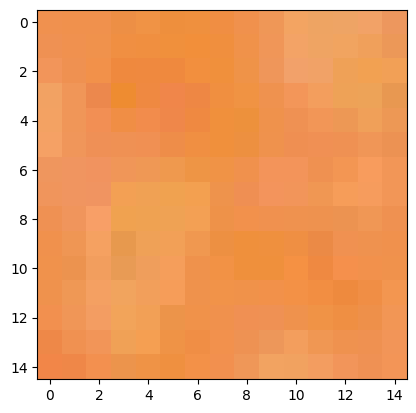

In [ ]:
# cropping the array

img_cropped = img[285:300, 285:300].copy()
img_cropped_rgb = cv.cvtColor(img_cropped, cv.COLOR_BGR2RGB)
plt.imshow(img_cropped_rgb)
print(f'Image data shape: {img_cropped_rgb.shape}')

In [ ]:
# inspect the data type and shape
print('OpenCV image data type:', type(img))
print(f'Image data shape: {img.shape}')

OpenCV image data type: <class 'numpy.ndarray'>
Image data shape: (600, 600, 3)


In [ ]:
# convert from BGR -> RGB for sake of matplotlib
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

3


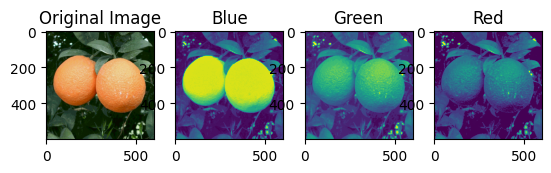

In [ ]:
# split image into respective channels

channels = cv.split(img_rgb)
print(len(channels))
titles = ['Original Image', 'Blue', 'Green', 'Red']

plt.subplot(1,4,1)
plt.imshow(img_rgb), plt.title(titles[0])

for i in range(len(channels)):
    plt.subplot(1,4,i+2)
    plt.imshow(channels[i])
    plt.title(titles[i+1])

plt.show()

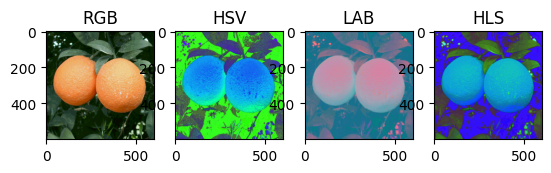

In [ ]:
# change to different color spaces

img_hsv = cv.cvtColor(img_rgb, cv.COLOR_RGB2HSV)
img_lab = cv.cvtColor(img_rgb, cv.COLOR_RGB2LAB)
img_hls = cv.cvtColor(img_rgb, cv.COLOR_RGB2HLS)

titles = ['RGB', 'HSV', 'LAB', 'HLS']
imgs = [img_hsv, img_lab, img_hls]

plt.subplot(1,4,1)
plt.imshow(img_rgb), plt.title(titles[0])

for i in range(len(imgs)):
    plt.subplot(1,4,i+2)
    plt.imshow(imgs[i])
    plt.title(titles[i+1])

plt.show()

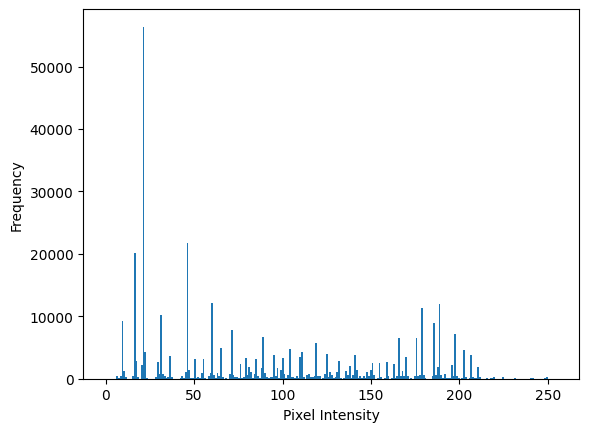

In [ ]:
# Evaluate image histograms
# reference: https://docs.opencv.org/4.x/d1/db7/tutorial_py_histogram_begins.html

# convert image to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# cv2_imshow(img_gray)

histSize = 256
histRange = (0, 255)
# hist = cv.calcHist([img_gray], [0], None, [histSize], histRange)
# plt.plot(hist)

plt.hist(img_gray.flatten(), bins=histSize, range=histRange, alpha=1)
# plt.title('Histogram of Grayscale Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


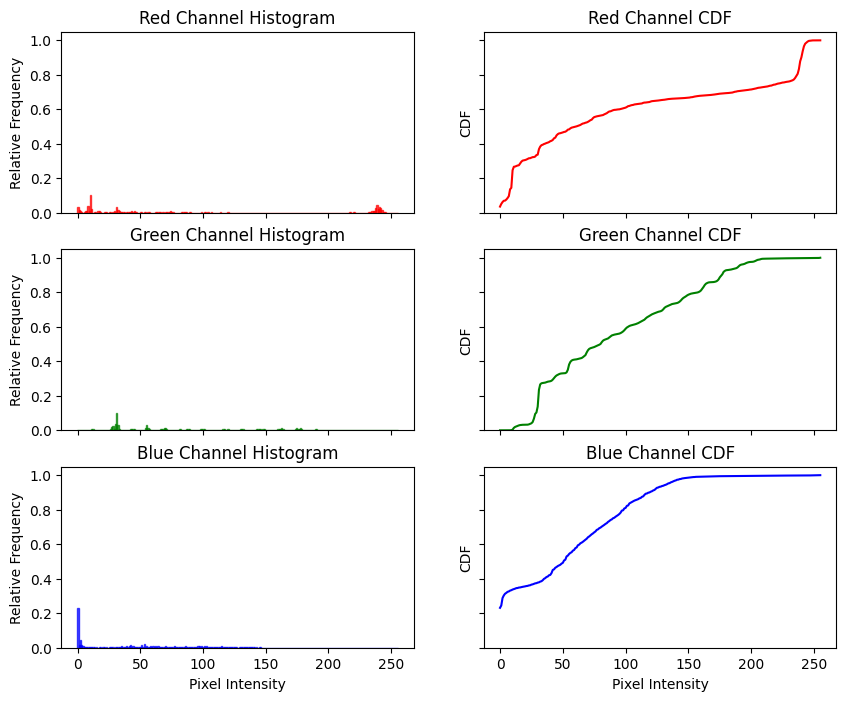

In [ ]:
# plot histogram for all three channels of RGB image

# Initialize figure and axis
fig, axes = plt.subplots(3, 2, figsize=(10, 8), sharex='col', sharey='row')
colors = ['red', 'green', 'blue']
channel_names = ['Red', 'Green', 'Blue']

for i, color in enumerate(colors):
    # Calculate the histogram for each channel
    hist, bins = np.histogram(img_rgb[..., i], bins=256, range=(0, 256))

    # Normalize the histogram to get relative frequency
    hist = hist / hist.sum()

    # Calculate the CDF
    cdf = np.cumsum(hist)

    # Plot the histogram
    axes[i, 0].bar(bins[:-1], hist, width=1, edgecolor=color, color=color, alpha=0.7)
    axes[i, 0].set_title(f'{channel_names[i]} Channel Histogram')
    axes[i, 0].set_ylabel('Relative Frequency')

    # Plot the CDF
    axes[i, 1].plot(bins[:-1], cdf, color=color)
    axes[i, 1].set_title(f'{channel_names[i]} Channel CDF')
    axes[i, 1].set_ylabel('CDF')

# Set common labels
axes[-1, 0].set_xlabel('Pixel Intensity')
axes[-1, 1].set_xlabel('Pixel Intensity')

# plt.tight_layout()
plt.show()

## Section 2: Image Enhancement

### Histogram Equalization


In [ ]:
# Histogram equalization
# references:
# - https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html
# - https://www.sci.utah.edu/~acoste/uou/Image/project1/Arthur_COSTE_Project_1_report.html

path_to_image = 'orange2.jpg'

# read the image from the directory
img = cv.imread(path_to_image)

# cv2_imshow(img)
img.shape

(360, 640, 3)

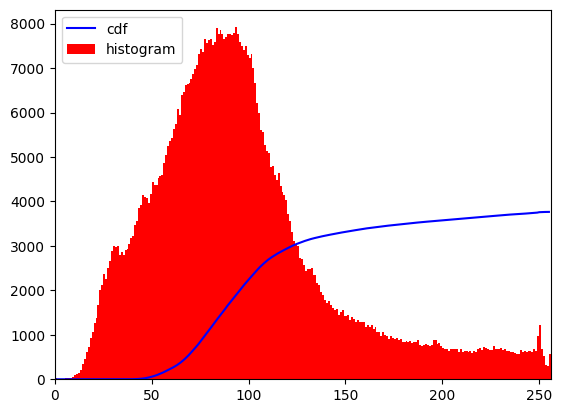

In [ ]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

hist,bins = np.histogram(img_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

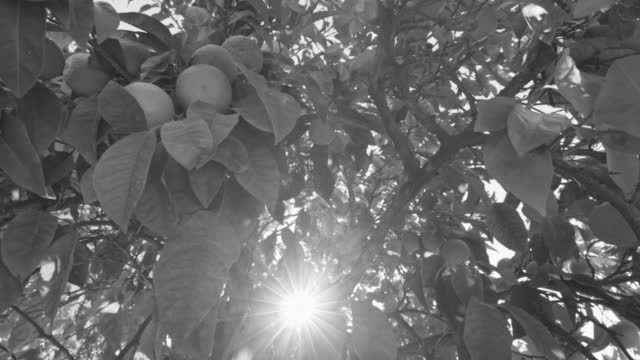

In [ ]:
cv2_imshow(img_gray)

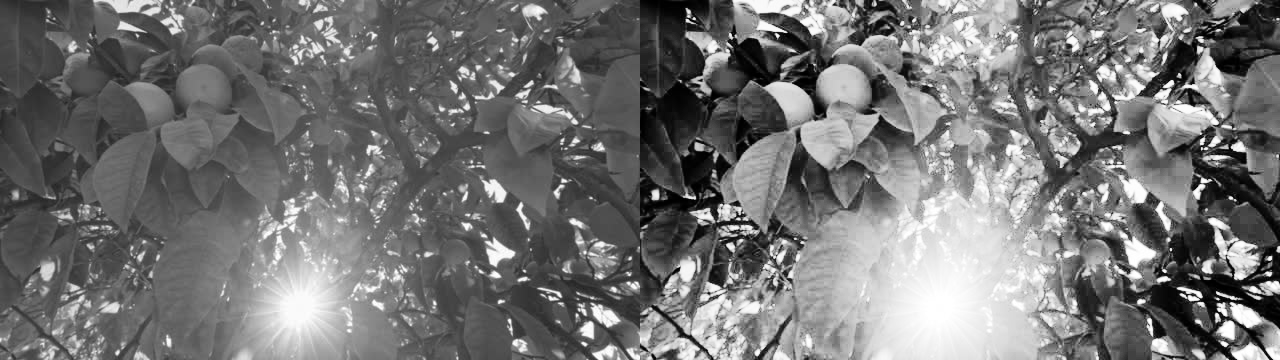

In [ ]:
dst = cv.equalizeHist(img_gray)
res = np.hstack((img_gray, dst)) #stacking images side-by-side
cv2_imshow(res)

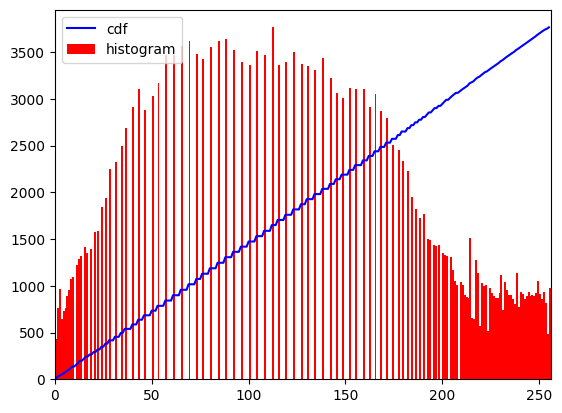

In [ ]:
hist, bins = np.histogram(dst.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(dst.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

### Filtering

## Section 3: Segmentation

### Pixel-Wise Segmentation

1. Threshold-based using a manual approach

2. Otsu thresholding

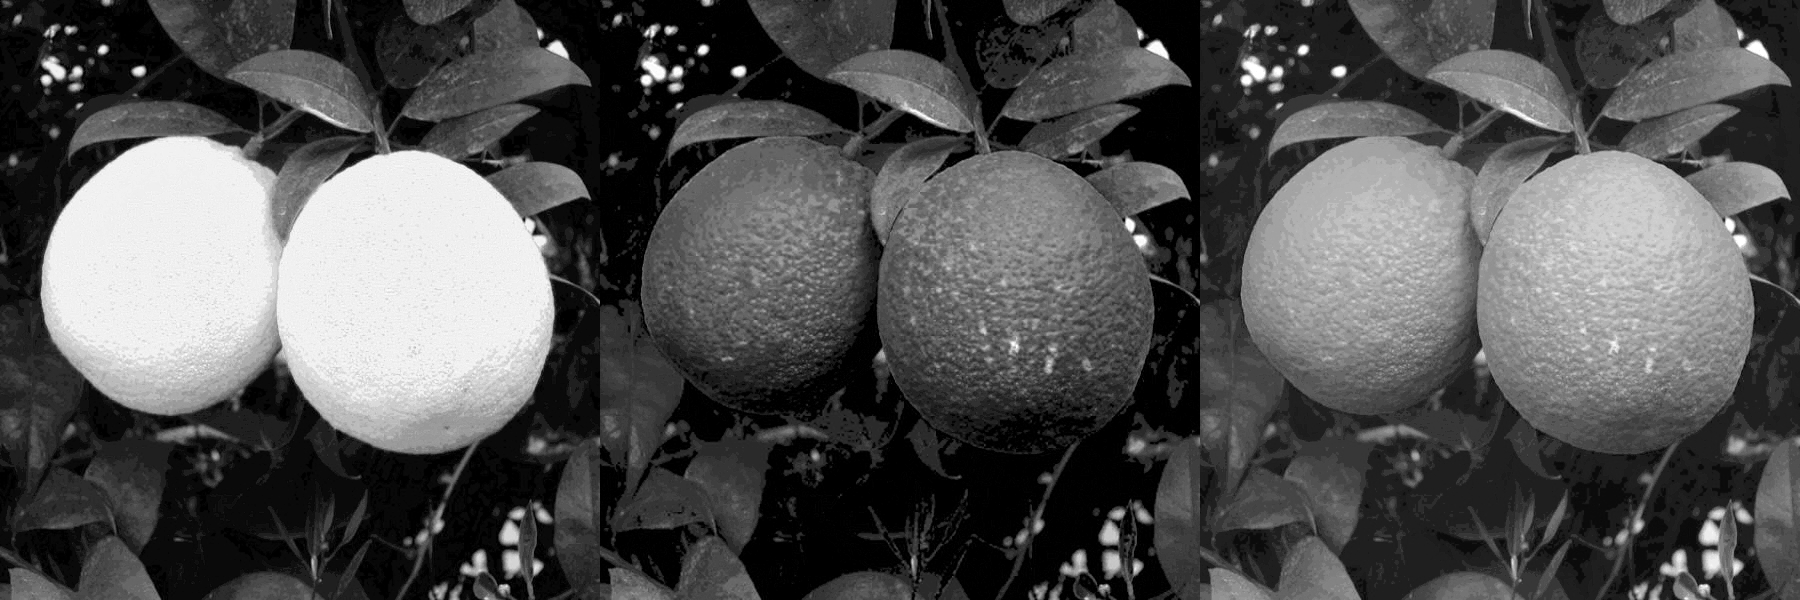

In [ ]:
# Manual approach

path_to_image = 'orange.png'

# read the image from the directory
img = cv.imread(path_to_image)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

red, blue, green = cv.split(img_rgb)
res = np.hstack((red, green, blue))
cv2_imshow(res)

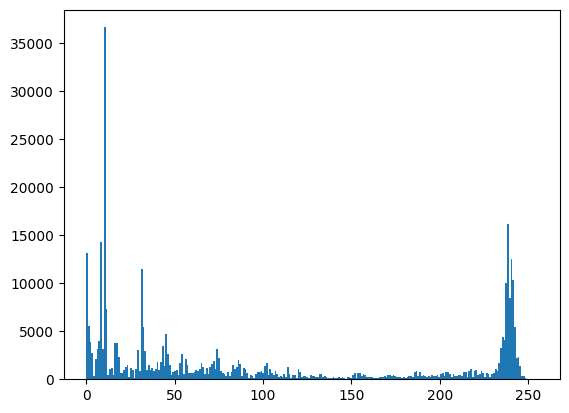

In [ ]:
# get the histogram

plt.hist(red.flatten(), bins=256)
plt.show()

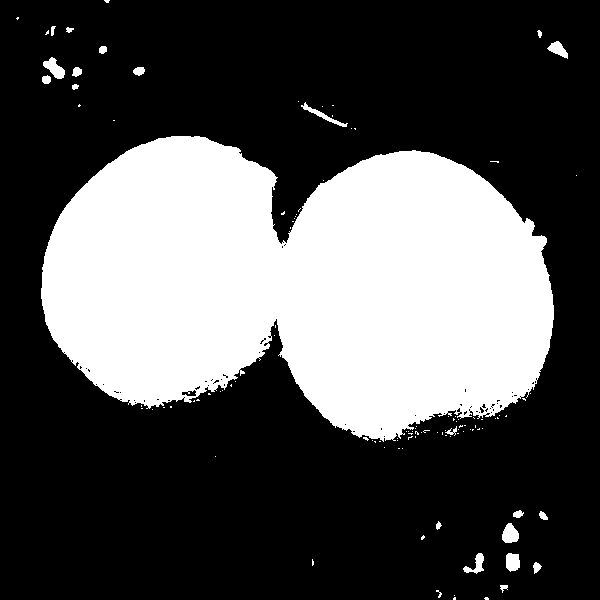

In [ ]:
mask = red > 160
# cv2_imshow(mask)
mask = mask.astype(np.uint8) * 255
cv2_imshow(mask)

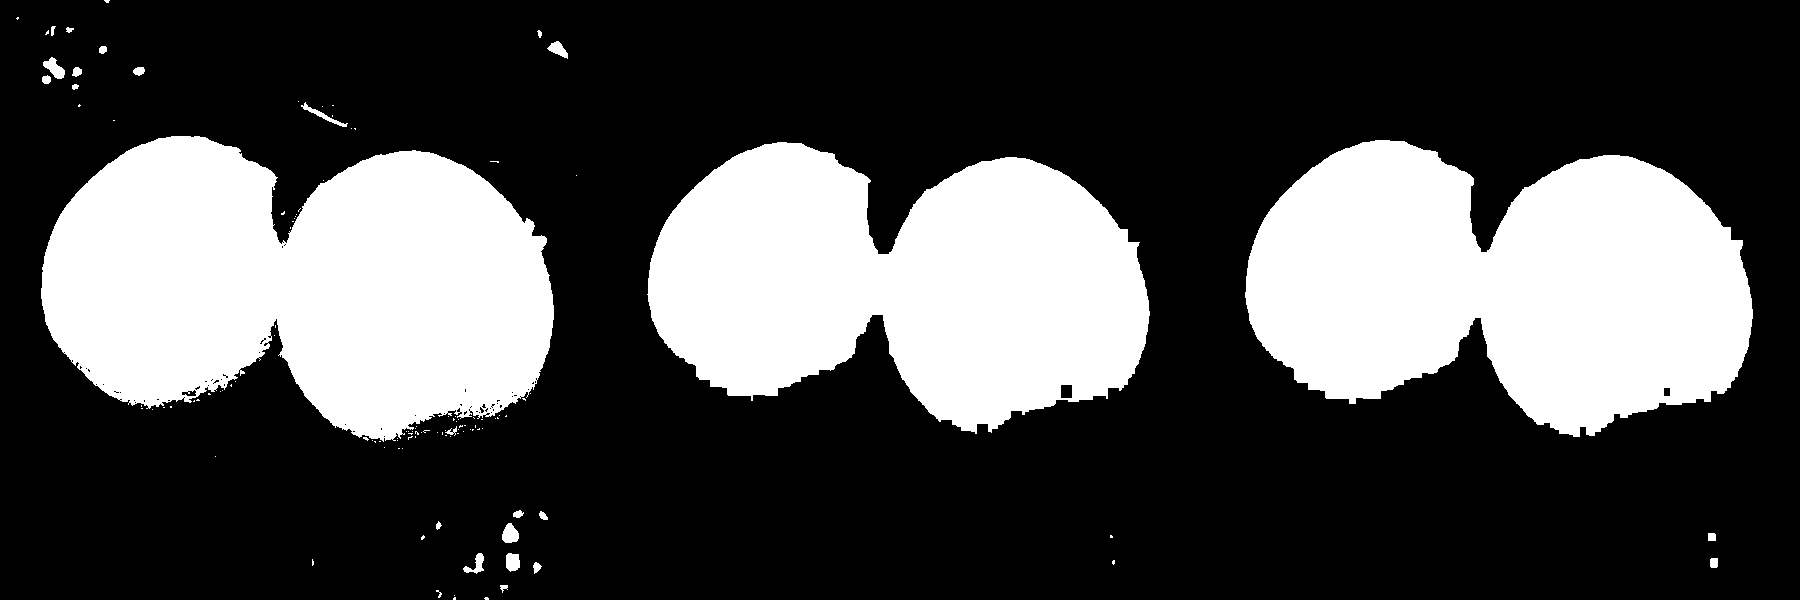

In [ ]:
# erosion
kernel = np.ones((6,6), np.uint8)
mask_eroded = cv.erode(mask, kernel, iterations=2)
# cv2_imshow(mask_eroded)

# dilation
mask_dilated = cv.dilate(mask_eroded, kernel, iterations=1)
# cv2_imshow(mask_dilated)

res = np.hstack((mask, mask_eroded, mask_dilated))
cv2_imshow(res)

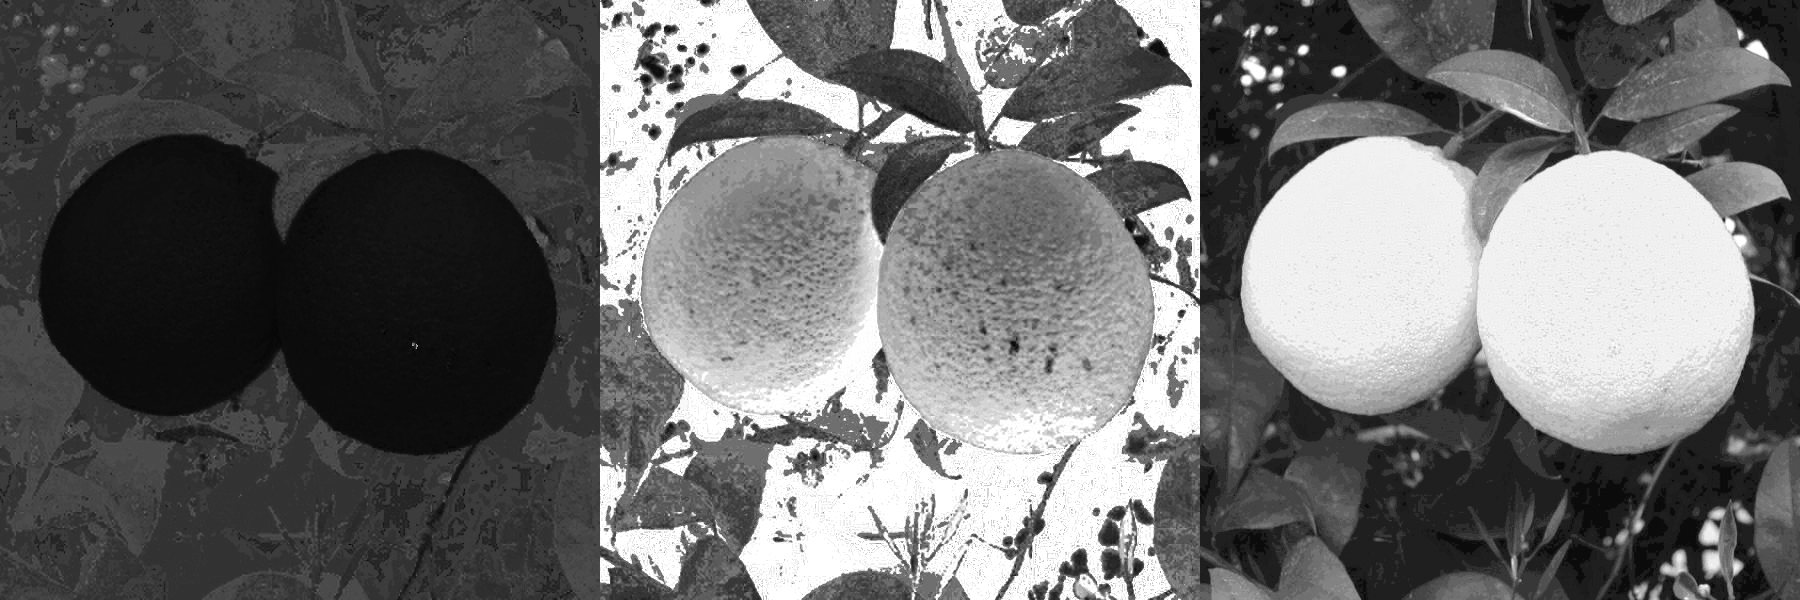

In [ ]:
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

hue, saturation, value = cv.split(img_hsv)
res = np.hstack((hue, saturation, value))
cv2_imshow(res)

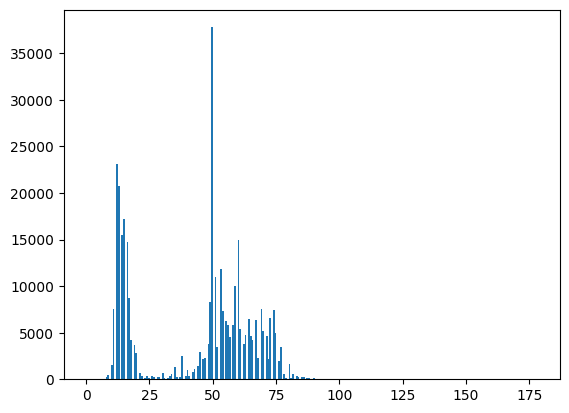

In [ ]:
# get the histogram
plt.hist(hue.flatten(), bins=256)
plt.show()

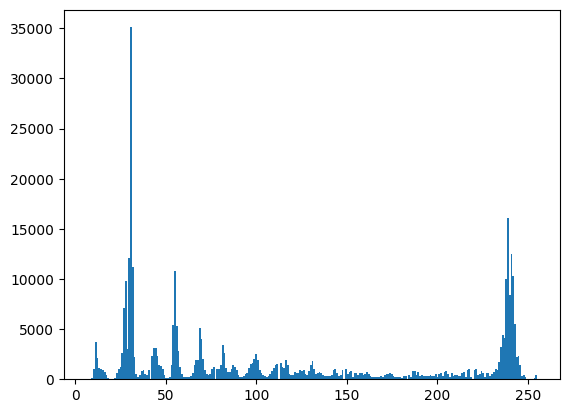

In [ ]:
# get the histogram
plt.hist(value.flatten(), bins=256)
plt.show()

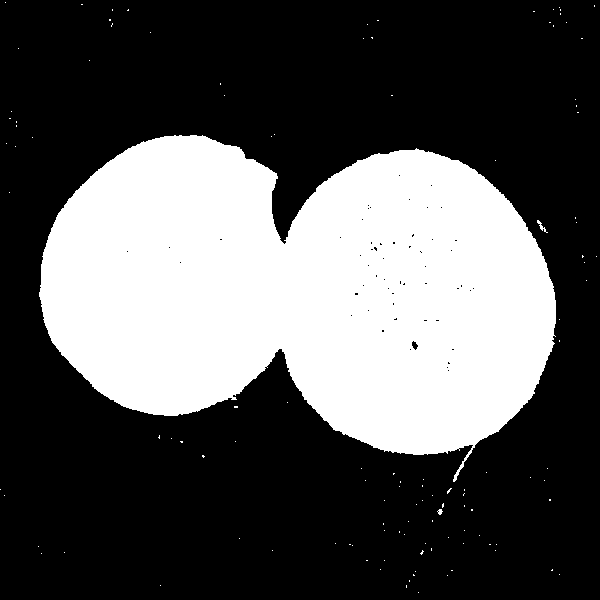

In [ ]:
mask = hue < 22
mask = mask.astype(np.uint8) * 255
cv2_imshow(mask)

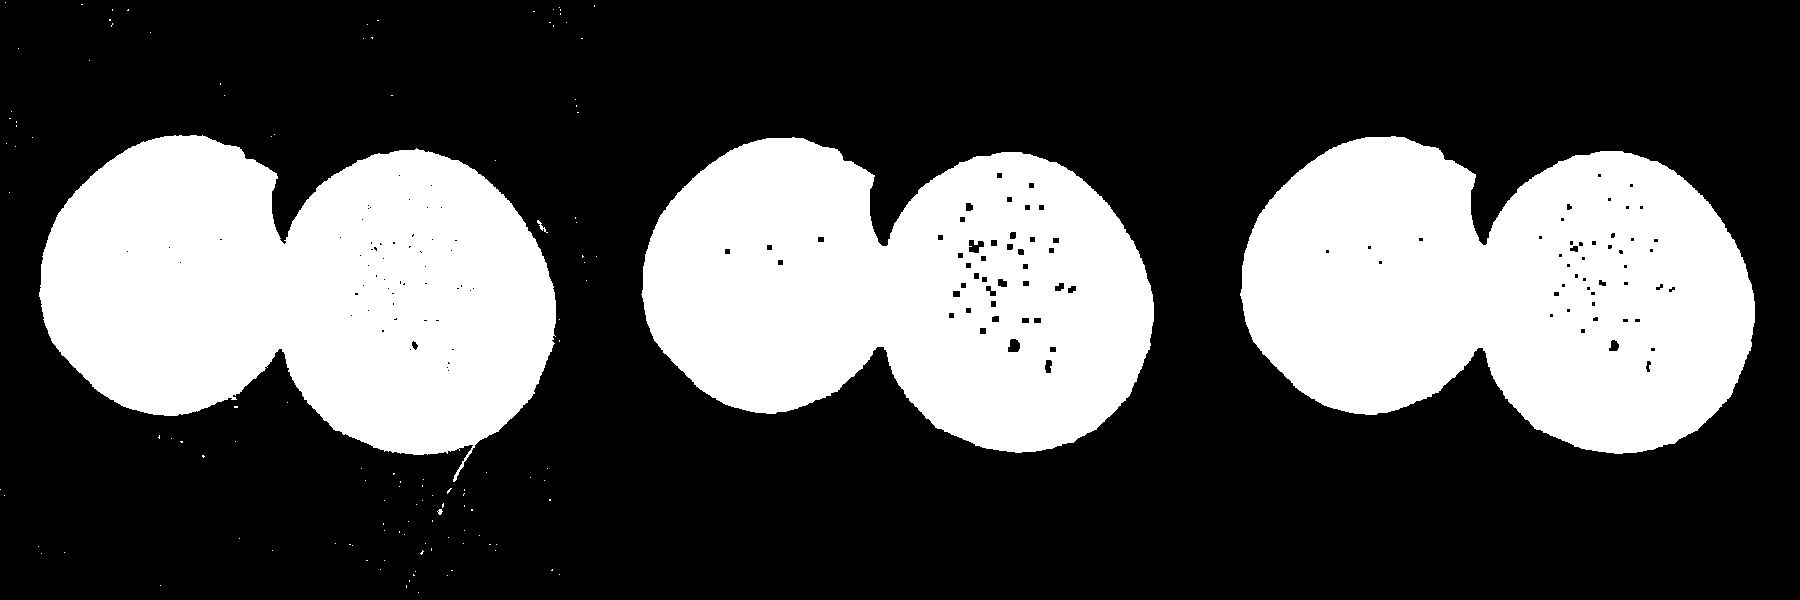

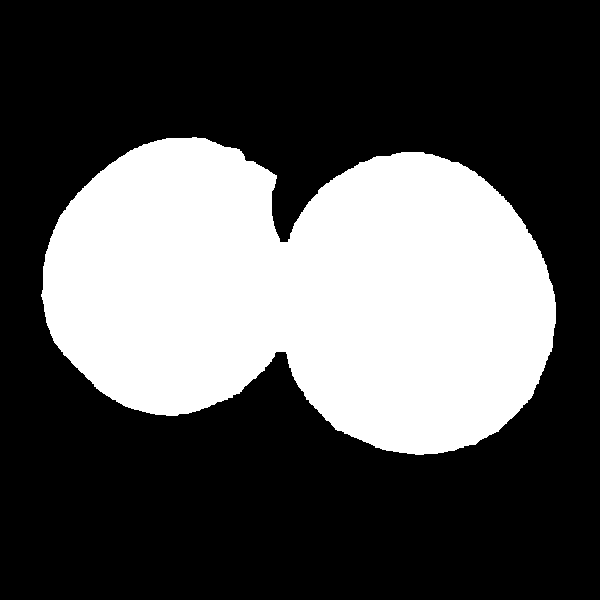

In [ ]:
# erosion
kernel = np.ones((3,3), np.uint8)
mask_eroded = cv.erode(mask, kernel, iterations=2)
# cv2_imshow(mask_eroded)

# dilation
mask_dilated = cv.dilate(mask_eroded, kernel, iterations=1)
# cv2_imshow(mask_dilated)

# closing
closing_kernel = np.ones((8,8), np.uint8)
mask_closed = cv.morphologyEx(mask_dilated, cv.MORPH_CLOSE, closing_kernel)

res = np.hstack((mask, mask_eroded, mask_dilated))
cv2_imshow(res)

cv2_imshow(mask_closed)

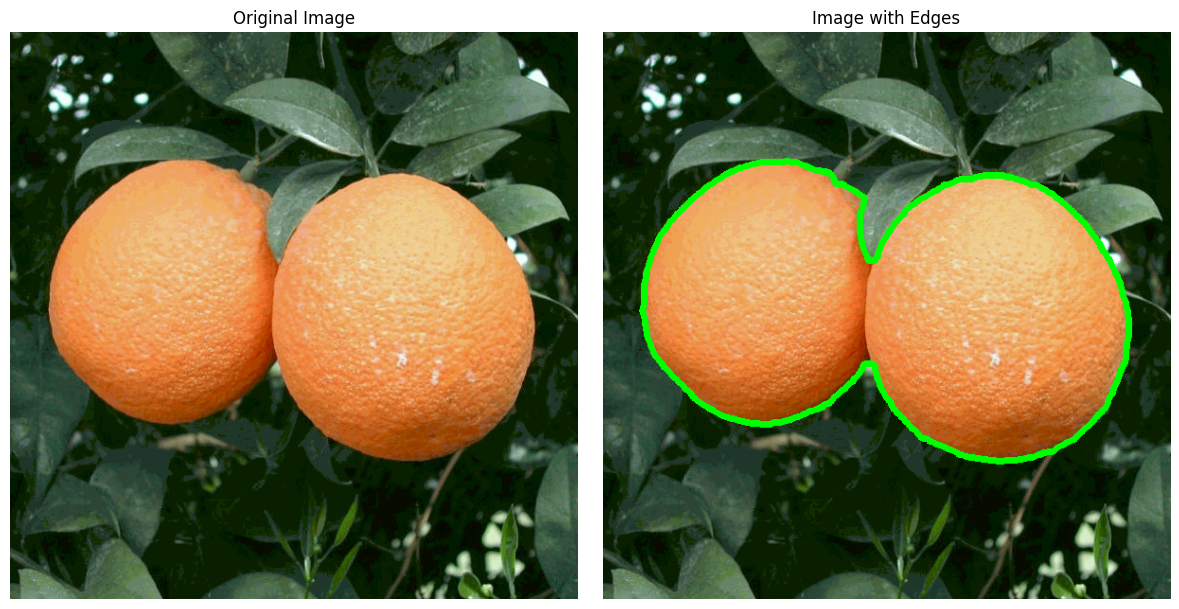

In [ ]:
# edge detection

# Perform Canny edge detection
# edges = cv.Canny(mask_closed, threshold1=100, threshold2=200)

# Create a copy of the original image to draw edges
image_with_edges = img_rgb.copy()

# Find contours from the edges
contours, _ = cv.findContours(mask_closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
cv.drawContours(image_with_edges, contours, -1, (0, 255, 0), 5)

# Plot the original image and the image with edges
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(image_with_edges)
axes[1].set_title('Image with Edges')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
len(contours)

1

In [ ]:
# TODO: Get the result for the semantic segmentation:
#     - add a mask over the image in the region of interest

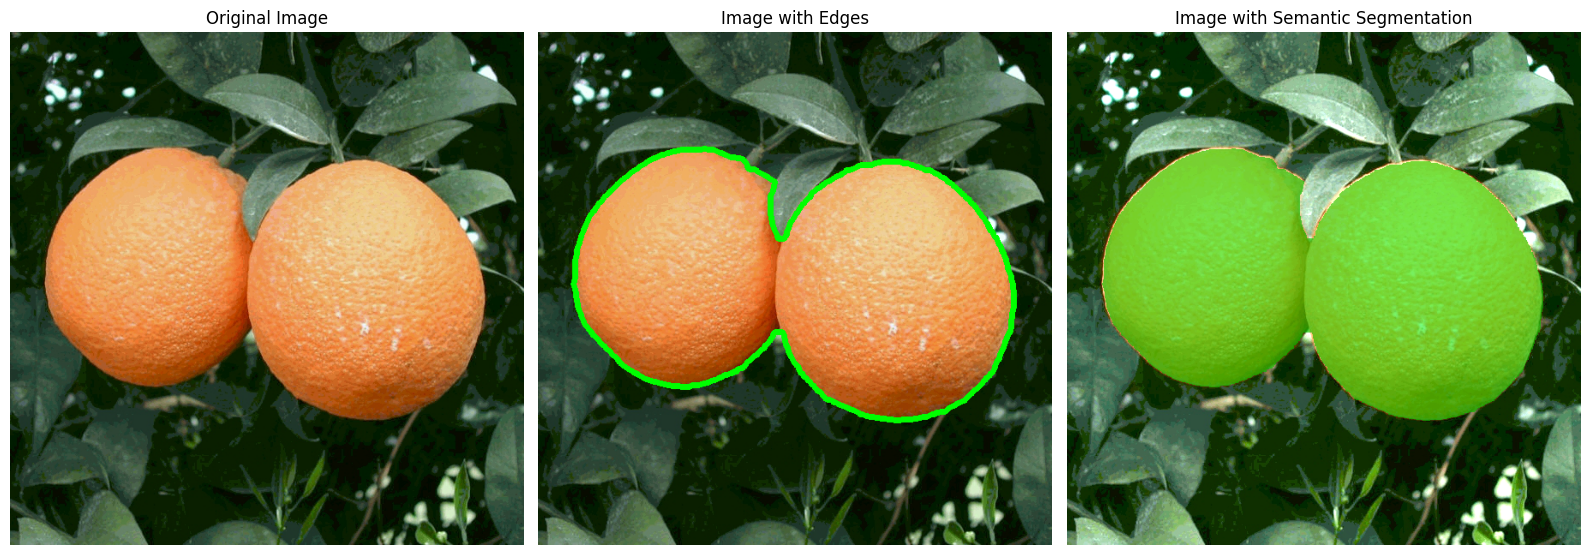

In [ ]:
# Create an overlay image with the specified color
overlay = np.zeros_like(img_rgb, dtype=np.uint8)
overlay[:] = (0, 255, 0)

# Apply the mask to the overlay
colored_segment = cv.bitwise_and(overlay, overlay, mask=mask_closed)

# Invert the mask to get the part of the image that will remain unchanged
mask_inv = cv.bitwise_not(mask_closed)

# Blend the colored segment with the original image using the alpha value
alpha = 0.5
colored_segment = cv.addWeighted(img_rgb, 1 - alpha, colored_segment, alpha, 0)

# Keep only the unmasked part of the original image
unchanged_part = cv.bitwise_and(img_rgb, img_rgb, mask=mask_inv)

# Combine the unchanged part with the colored segment
result = cv.add(unchanged_part, colored_segment)

# cv2_imshow(overlay)
# cv2_imshow(colored_segment)
# cv2_imshow(mask_inv)
# cv2_imshow(unchanged_part)
# cv2_imshow(result)

# Plot the original image and the image with edges
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
axes[0].imshow(img_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(image_with_edges)
axes[1].set_title('Image with Edges')
axes[1].axis('off')

axes[2].imshow(result)
axes[2].set_title('Image with Semantic Segmentation')
axes[2].axis('off')

plt.tight_layout()
plt.show()


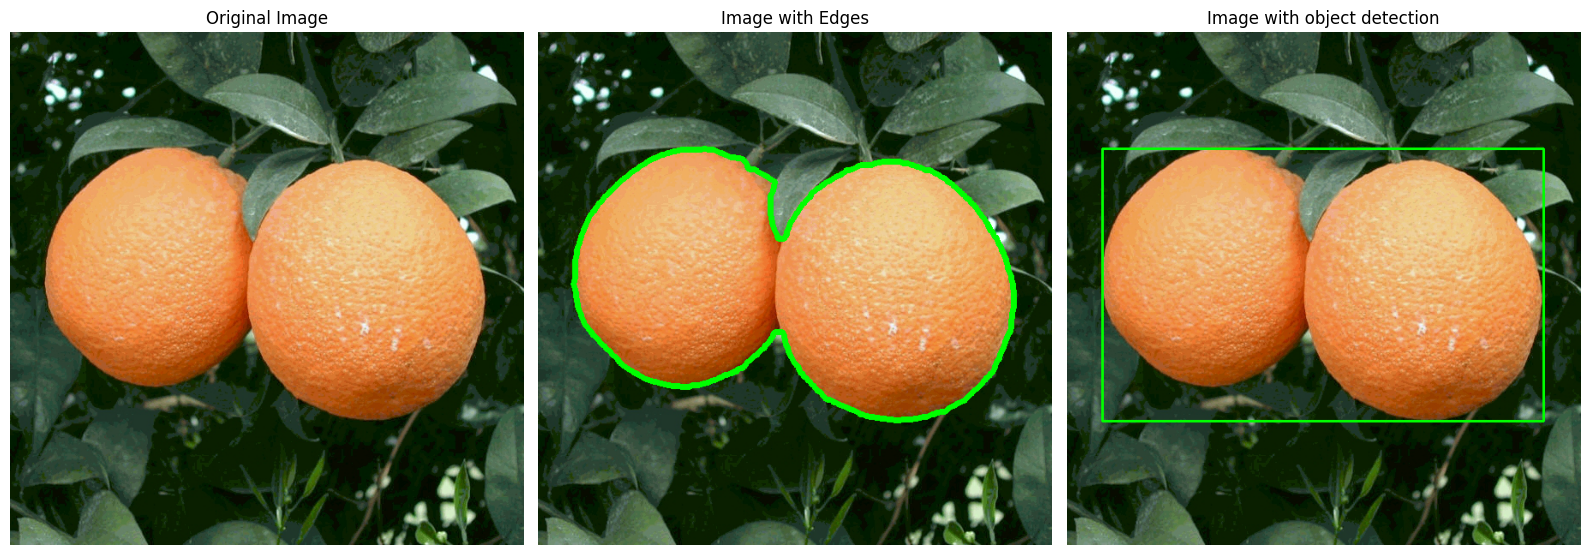

In [ ]:
# object detection
#   - drawing a bounding box around the segments

img_bbox = img_rgb.copy()
# Draw bounding boxes around contours
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    cv.rectangle(img_bbox, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Plot the original image and the image with edges
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
axes[0].imshow(img_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(image_with_edges)
axes[1].set_title('Image with Edges')
axes[1].axis('off')

axes[2].imshow(img_bbox)
axes[2].set_title('Image with object detection')
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# TODO: Instance segmentation:
#     - how to separate the region into different instances?

### Pixel-Wise Segmentation (part 2)

1. Threshold-based using a manual approach

2. Otsu thresholding

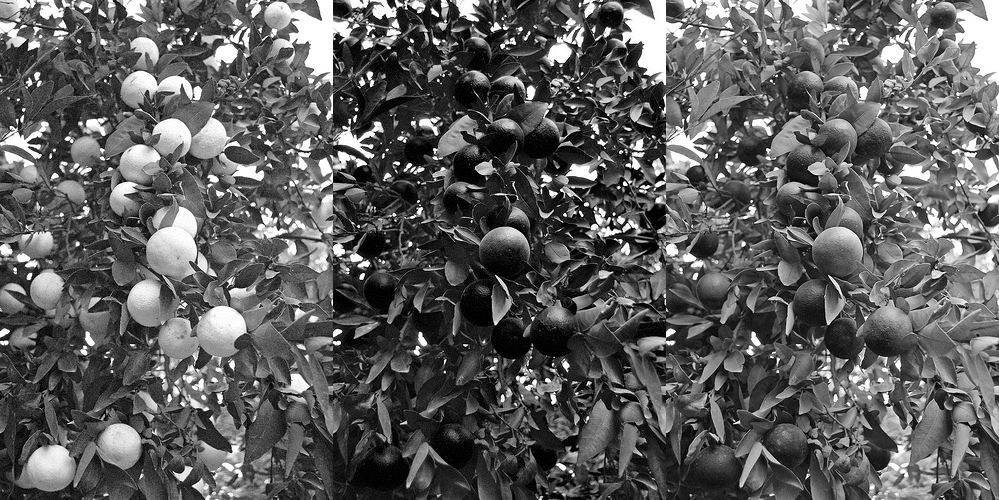

In [ ]:
# Manual approach

path_to_image = 'orange_tree.png'

# read the image from the directory
img = cv.imread(path_to_image)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

red, blue, green = cv.split(img_rgb)
res = np.hstack((red, green, blue))
cv2_imshow(res)

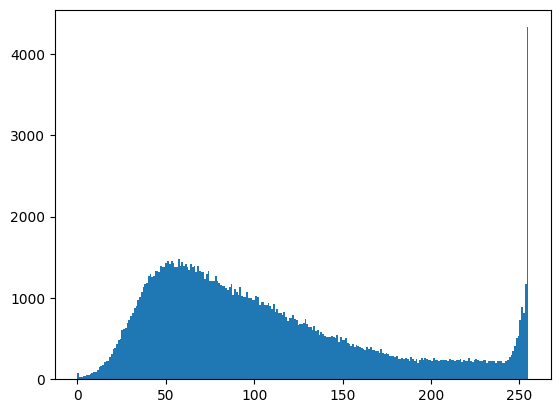

In [ ]:
# get the histogram

plt.hist(red.flatten(), bins=256)
plt.show()

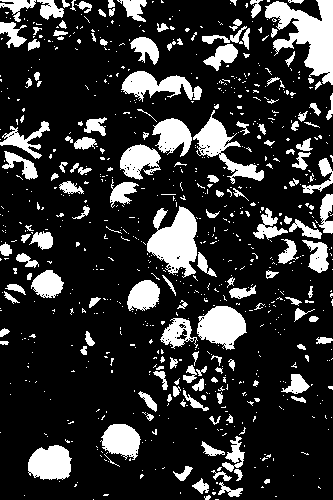

In [ ]:
mask = red > 160
# cv2_imshow(mask)
mask = mask.astype(np.uint8) * 255
cv2_imshow(mask)

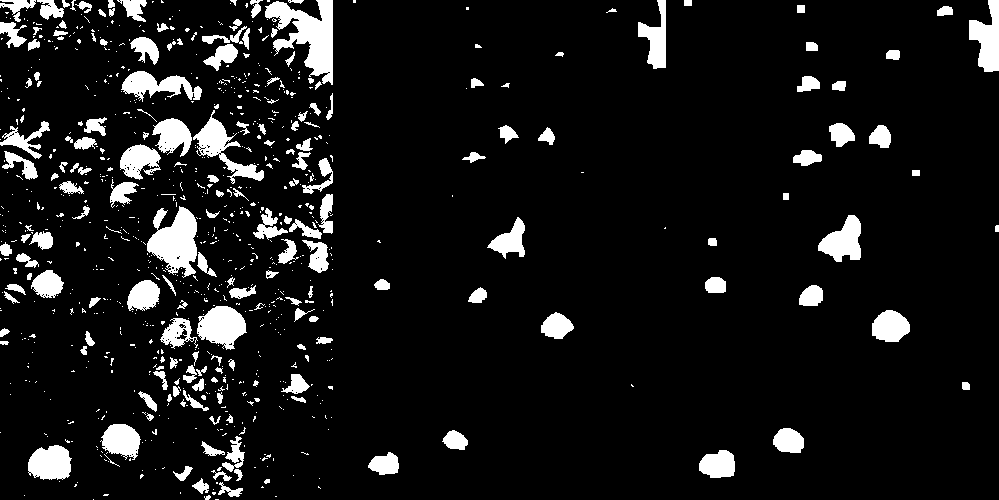

In [ ]:
# erosion
kernel = np.ones((6,6), np.uint8)
mask_eroded = cv.erode(mask, kernel, iterations=2)
# cv2_imshow(mask_eroded)

# dilation
mask_dilated = cv.dilate(mask_eroded, kernel, iterations=1)
# cv2_imshow(mask_dilated)

res = np.hstack((mask, mask_eroded, mask_dilated))
cv2_imshow(res)

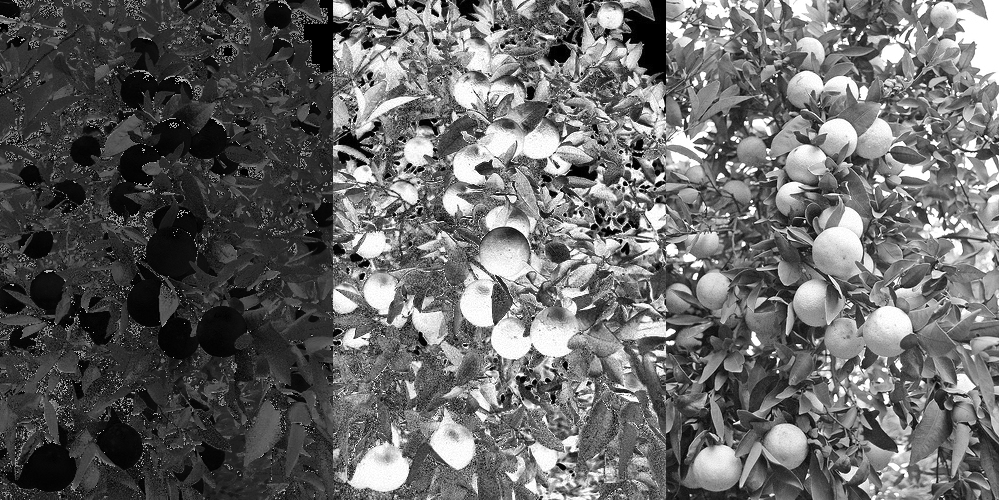

In [ ]:
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

hue, saturation, value = cv.split(img_hsv)
res = np.hstack((hue, saturation, value))
cv2_imshow(res)

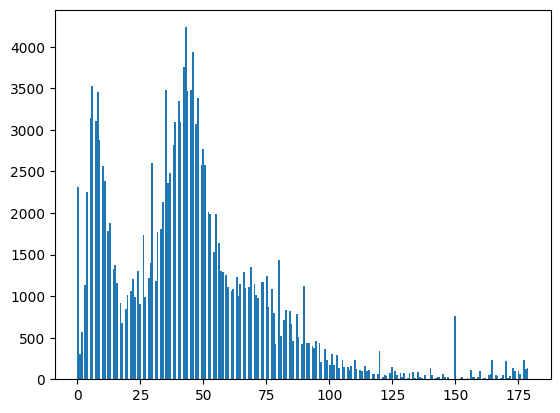

In [ ]:
# get the histogram
plt.hist(hue.flatten(), bins=256)
plt.show()

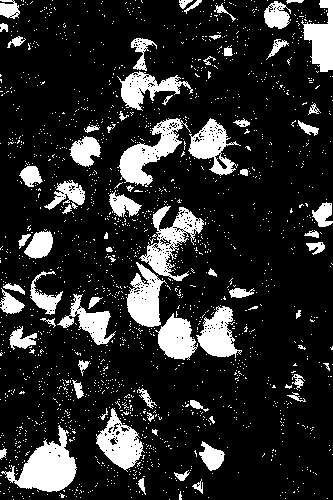

In [ ]:
mask = hue < 12
mask = mask.astype(np.uint8) * 255
cv2_imshow(mask)

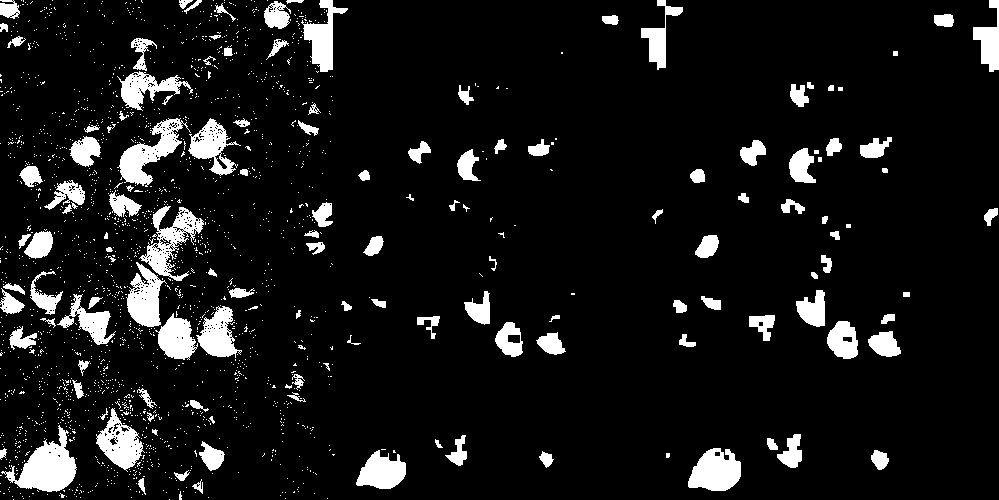

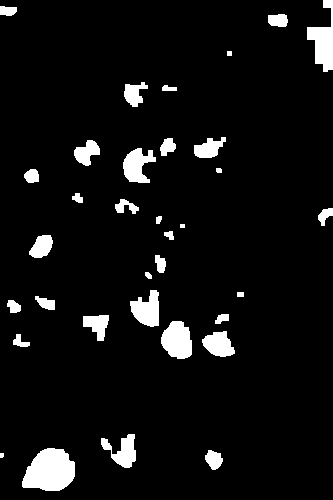

In [ ]:
# erosion
kernel = np.ones((4,4), np.uint8)
mask_eroded = cv.erode(mask, kernel, iterations=2)
# cv2_imshow(mask_eroded)

# dilation
mask_dilated = cv.dilate(mask_eroded, kernel, iterations=1)
# cv2_imshow(mask_dilated)

# closing
closing_kernel = np.ones((5,5), np.uint8)
mask_closed = cv.morphologyEx(mask_dilated, cv.MORPH_CLOSE, closing_kernel)

res = np.hstack((mask, mask_eroded, mask_dilated))
cv2_imshow(res)

cv2_imshow(mask_closed)

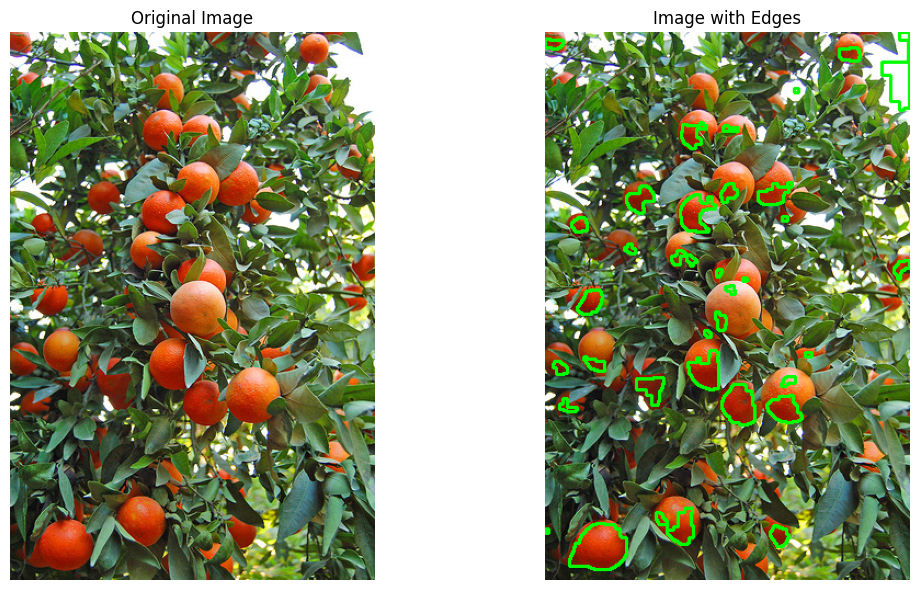

In [ ]:
# edge detection

# Perform Canny edge detection
# edges = cv.Canny(mask_closed, threshold1=100, threshold2=200)

# Create a copy of the original image to draw edges
image_with_edges = img_rgb.copy()

# Find contours from the edges
contours, _ = cv.findContours(mask_closed, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
cv.drawContours(image_with_edges, contours, -1, (0, 255, 0), 2)

# Plot the original image and the image with edges
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(image_with_edges)
axes[1].set_title('Image with Edges')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
len(contours)

1

In [ ]:
# TODO: Get the result for the semantic segmentation:
#     - add a mask over the image in the region of interest

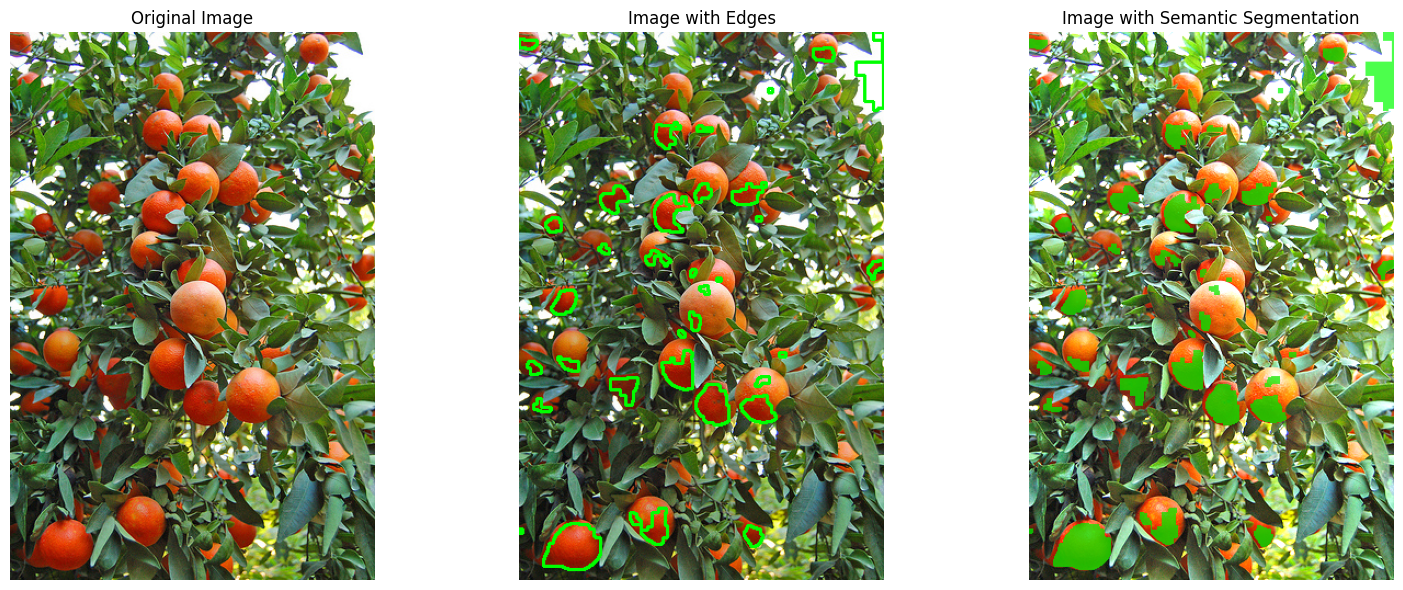

In [ ]:
# Create an overlay image with the specified color
overlay = np.zeros_like(img_rgb, dtype=np.uint8)
overlay[:] = (0, 255, 0)

# Apply the mask to the overlay
colored_segment = cv.bitwise_and(overlay, overlay, mask=mask_closed)

# Invert the mask to get the part of the image that will remain unchanged
mask_inv = cv.bitwise_not(mask_closed)

# Blend the colored segment with the original image using the alpha value
alpha = 0.7
colored_segment = cv.addWeighted(img_rgb, 1 - alpha, colored_segment, alpha, 0)

# Keep only the unmasked part of the original image
unchanged_part = cv.bitwise_and(img_rgb, img_rgb, mask=mask_inv)

# Combine the unchanged part with the colored segment
result = cv.add(unchanged_part, colored_segment)

# cv2_imshow(overlay)
# cv2_imshow(colored_segment)
# cv2_imshow(mask_inv)
# cv2_imshow(unchanged_part)
# cv2_imshow(result)

# Plot the original image and the image with edges
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
axes[0].imshow(img_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(image_with_edges)
axes[1].set_title('Image with Edges')
axes[1].axis('off')

axes[2].imshow(result)
axes[2].set_title('Image with Semantic Segmentation')
axes[2].axis('off')

plt.tight_layout()
plt.show()


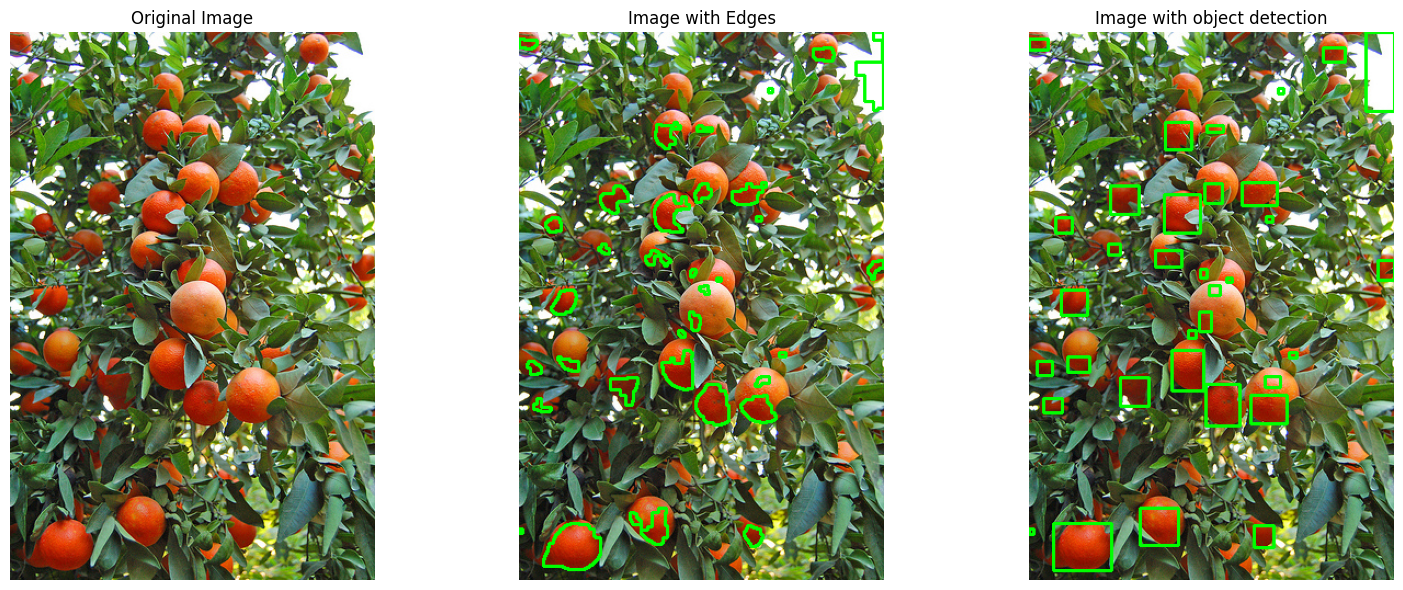

In [ ]:
# object detection
#   - drawing a bounding box around the segments

img_bbox = img_rgb.copy()
# Draw bounding boxes around contours
for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    cv.rectangle(img_bbox, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Plot the original image and the image with edges
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
axes[0].imshow(img_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(image_with_edges)
axes[1].set_title('Image with Edges')
axes[1].axis('off')

axes[2].imshow(img_bbox)
axes[2].set_title('Image with object detection')
axes[2].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# TODO: Instance segmentation:
#     - how to separate the region into different instances?

### TODOs:

1. Review the process
2. Figure out how to get images into this notebook more easily
3. Work on the evaluation process
  - Come up the ground truth data
  - Define metrics like precision, recall, IoU, mIoU, mAP
  - Explore using COCO API for this
4. Provide other dataset examples for students to test with:
  - [strawberry dataset](https://drive.google.com/drive/folders/1aSH37oNz7Wzlo6E72dLjJUUmVCJMGtEB)
  - [apple dataset](https://drive.google.com/drive/folders/158GPbAWaFSekaxb-8d6JcvDe5PXeF0-E)
  - [See if you can get datasets with annotations already done]

In [ ]:
#!pip install opencv-python ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.8 MB/s eta 0:00:00


In [ ]:
# Code to get the sliders for threshold setting

# import cv2
# import numpy as np
# from IPython.display import display, clear_output
# import ipywidgets as widgets
# from google.colab.patches import cv2_imshow

# def apply_thresholds(image, r_low, r_high, g_low, g_high, b_low, b_high):
#     # Split the image into its three channels
#     b_channel, g_channel, r_channel = cv2.split(image)

#     # Apply the thresholds to each channel
#     _, r_thresh = cv2.threshold(r_channel, r_low, r_high, cv2.THRESH_BINARY)
#     _, g_thresh = cv2.threshold(g_channel, g_low, g_high, cv2.THRESH_BINARY)
#     _, b_thresh = cv2.threshold(b_channel, b_low, b_high, cv2.THRESH_BINARY)

#     # Combine the thresholds
#     combined = cv2.merge((b_thresh, g_thresh, r_thresh))

#     return combined

# def update_image(r_low, r_high, g_low, g_high, b_low, b_high):
#     combined_image = apply_thresholds(image, r_low, r_high, g_low, g_high, b_low, b_high)
#     clear_output(wait=True)
#     display(sliders)
#     cv2_imshow(combined_image)

# # Load the image
# image_path = 'orange_tree.png'
# image = cv2.imread(image_path)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# # Create sliders for each channel's low and high thresholds
# r_low_slider = widgets.IntSlider(min=0, max=255, value=0, description='R Low')
# r_high_slider = widgets.IntSlider(min=0, max=255, value=255, description='R High')
# g_low_slider = widgets.IntSlider(min=0, max=255, value=0, description='G Low')
# g_high_slider = widgets.IntSlider(min=0, max=255, value=255, description='G High')
# b_low_slider = widgets.IntSlider(min=0, max=255, value=0, description='B Low')
# b_high_slider = widgets.IntSlider(min=0, max=255, value=255, description='B High')

# sliders = widgets.VBox([
#     r_low_slider, r_high_slider,
#     g_low_slider, g_high_slider,
#     b_low_slider, b_high_slider
# ])
# display(sliders)

# widgets.interactive(update_image,
#                     r_low=r_low_slider, r_high=r_high_slider,
#                     g_low=g_low_slider, g_high=g_high_slider,
#                     b_low=b_low_slider, b_high=b_high_slider)